# Playground for Interpretting Clusters

- Stephen W. Thomas
- Used for MMA 869, MMAI 869, and GMMA 869

In [1]:
import datetime
print(datetime.datetime.now())

2020-06-18 08:41:56.859837


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Default plot settings
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16


plt.rc('figure', figsize=[8.0, 5.0])     # controls the size of the figure
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', grid=True)

# Read in Data

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/stepthom/sandbox/master/data/Mall_Customers.csv")

df = df.rename(index=str, columns={"Genre": "Male"})
df['Male'] = df['Male'].replace(['Male', 'Female'], [True, False])

list(df)
df.shape
df.info()
df.describe().transpose()
df.head(n=20)
df.tail()

['CustomerID', 'Male', 'Age', 'AnnualIncome', 'SpendingScore']

(200, 5)

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     200 non-null    int64
 1   Male           200 non-null    bool 
 2   Age            200 non-null    int64
 3   AnnualIncome   200 non-null    int64
 4   SpendingScore  200 non-null    int64
dtypes: bool(1), int64(4)
memory usage: 8.0+ KB


count    mean        std   min    25%    50%     75%    max
CustomerID     200.0  100.50  57.879185   1.0  50.75  100.5  150.25  200.0
Age            200.0   38.85  13.969007  18.0  28.75   36.0   49.00   70.0
AnnualIncome   200.0   60.56  26.264721  15.0  41.50   61.5   78.00  137.0
SpendingScore  200.0   50.20  25.823522   1.0  34.75   50.0   73.00   99.0

CustomerID   Male  Age  AnnualIncome  SpendingScore
0            1   True   19            15             39
1            2   True   21            15             81
2            3  False   20            16              6
3            4  False   23            16             77
4            5  False   31            17             40
5            6  False   22            17             76
6            7  False   35            18              6
7            8  False   23            18             94
8            9   True   64            19              3
9           10  False   30            19             72
10          11   True   67            19             14
11          12  False   35            19             99
12          13  False   58            20             15
13          14  False   24            20             77
14          15   True   37            20             13
15          16   True   22            20             79
16          17  False   35            21             35
17          18   True   20            21             66
18          19   True   52            23             29
19          20  False   35            23             98

CustomerID   Male  Age  AnnualIncome  SpendingScore
195         196  False   35           120             79
196         197  False   45           126             28
197         198   True   32           126             74
198         199   True   32           137             18
199         200   True   30           137             83

# Interpreting Clusters Case Study
We will use all 4 features, with Hierarchcial Clustering, wiht Euclidean distance and Ward Linkage

In [5]:
X = df.copy()
X = X.drop(['CustomerID'], axis=1)
col_names = X.columns
X.head()

scaler = StandardScaler()
X = scaler.fit_transform(X)
X[1:10,]

Male  Age  AnnualIncome  SpendingScore
0   True   19            15             39
1   True   21            15             81
2  False   20            16              6
3  False   23            16             77
4  False   31            17             40

array([[ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002]])

In [6]:
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

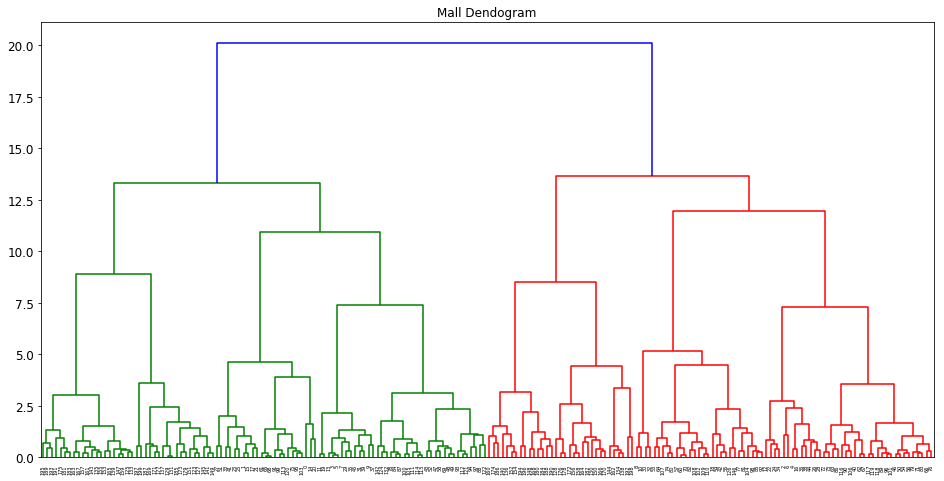

In [7]:
# Plot the dendogram 0 this time with better labels
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Mall Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl); 
plt.savefig('out/mall_dendro_1.png');

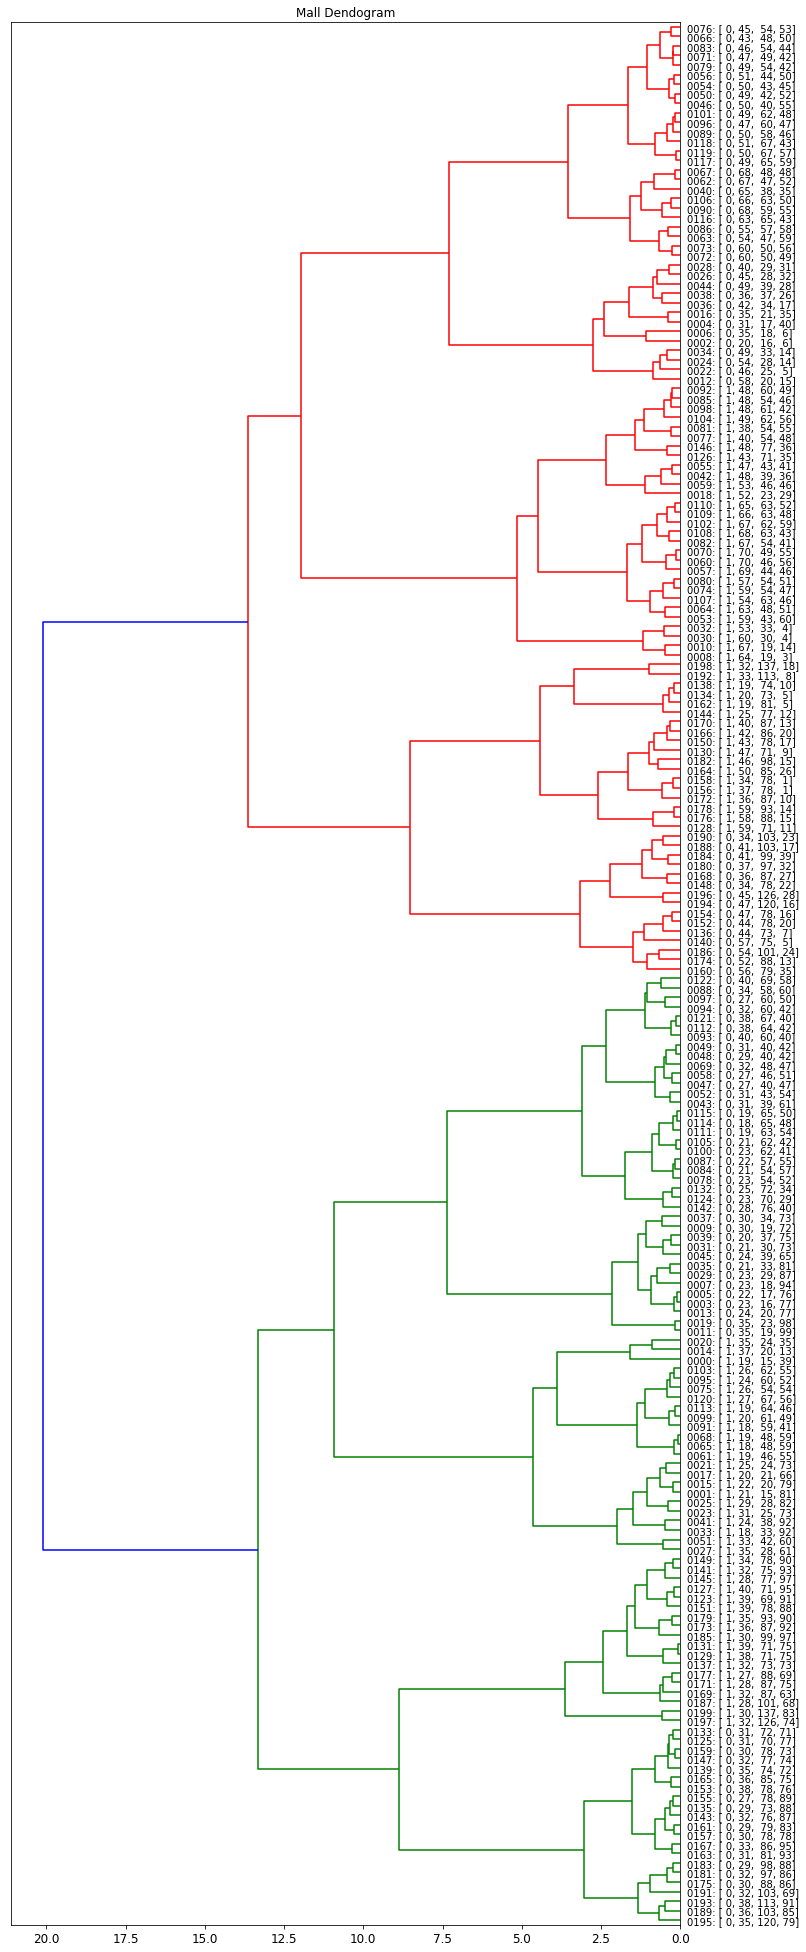

In [8]:
# Plot the dendogram 0 this time with better labels

# Cool custom function to give each leaf of the dendrogram a label - here, I'm just printing out feature values for each isntance in a pretty way.
def llf(id):
    Xr = [int(x) for x in scaler.inverse_transform(X[id, :])]
    return "{:>04d}: [{:>2d}, {:>2d}, {:>3d}, {:>2d}]".format(id, Xr[0], Xr[1], Xr[2], Xr[3])


# Plot the dendogram 0 this time with better labels
plt.figure(figsize=(12, 35));
plt.grid(False)
plt.title("Mall Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl, orientation="left", leaf_font_size=10, leaf_label_func=llf); 

In [9]:
# Let's find K=5 clusters
K=5
labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")

## For Each Cluster, Show Feature Means

In [10]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

means = np.zeros((K, X.shape[1]))

for i, label in enumerate(set(labels)):
    means[i,:] = X[labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(labels==label)))
    print(scaler.inverse_transform(means[i,:]))
    
means


Cluster 1 (n=39):
[ 0.46 32.69 86.54 82.13]

Cluster 2 (n=61):
[ 0.38 26.15 43.77 58.97]

Cluster 3 (n=33):
[ 0.55 41.45 89.09 16.18]

Cluster 4 (n=29):
[ 1.   56.55 50.03 41.34]

Cluster 5 (n=38):
[ 0.   49.79 44.11 39.66]


array([[ 0.04, -0.44,  0.99,  1.24],
       [-0.13, -0.91, -0.64,  0.34],
       [ 0.21,  0.19,  1.09, -1.32],
       [ 1.13,  1.27, -0.4 , -0.34],
       [-0.89,  0.79, -0.63, -0.41]])

## For Each Cluster, Show (Even More) Feature Stats

In [11]:
from scipy import stats

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def stats_to_df(d, scaler):
    tmp_df = pd.DataFrame(columns=col_names)
    
    tmp_df.loc[0] = scaler.inverse_transform(d.minmax[0])
    tmp_df.loc[1] = scaler.inverse_transform(d.mean)
    tmp_df.loc[2] = scaler.inverse_transform(d.minmax[1])
    tmp_df.loc[3] = scaler.inverse_transform(d.variance)
    tmp_df.loc[4] = scaler.inverse_transform(d.skewness)
    tmp_df.loc[5] = scaler.inverse_transform(d.kurtosis)
    tmp_df.index = ['Min', 'Mean', 'Max', 'Variance', 'Skewness', 'Kurtosis'] 
    return tmp_df.T

print('All Data:')
print('Number of Instances: {}'.format(X.shape[0]))
d = stats.describe(X, axis=0)
display(stats_to_df(d, scaler))

for i, label in enumerate(set(labels)):
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(d.nobs))
    d = stats.describe(X[labels==label], axis=0)
    display(stats_to_df(d, scaler))
    

All Data:
Number of Instances: 200


Min  Mean    Max  Variance  Skewness  Kurtosis
Male           0.00  0.44   1.00      0.94      0.56     -0.52
Age           18.00 38.85  70.00     52.85     45.57     29.31
AnnualIncome  15.00 60.56 137.00     86.89     68.93     57.26
SpendingScore  1.00 50.20  99.00     76.09     48.99     28.67


Cluster 1:
Number of Instances: 200


Min  Mean    Max  Variance  Skewness  Kurtosis
Male           0.00  0.46   1.00      0.95      0.52     -0.54
Age           27.00 32.69  40.00     39.85     44.55     25.92
AnnualIncome  69.00 86.54 137.00     70.72     96.41     96.51
SpendingScore 63.00 82.13  97.00     53.60     47.41     19.20


Cluster 2:
Number of Instances: 39


Min  Mean   Max  Variance  Skewness  Kurtosis
Male           0.00  0.38  1.00      0.92      0.69     -0.42
Age           18.00 26.15 40.00     41.68     46.73     28.13
AnnualIncome  15.00 43.77 76.00     73.21     58.64     25.12
SpendingScore 13.00 58.97 99.00     63.39     57.67     41.55


Cluster 3:
Number of Instances: 61


Min  Mean    Max  Variance  Skewness  Kurtosis
Male           0.00  0.55   1.00      0.96      0.35     -0.54
Age           19.00 41.45  59.00     47.81     34.55     32.56
AnnualIncome  71.00 89.09 137.00     70.89     93.18     86.22
SpendingScore  1.00 16.18  39.00     53.65     63.71     44.61


Cluster 4:
Number of Instances: 33


Min  Mean   Max  Variance  Skewness  Kurtosis
Male           1.00  1.00  1.00      0.44      0.44     -1.05
Age           38.00 56.55 70.00     45.58     36.55     22.07
AnnualIncome  19.00 50.03 77.00     68.85     45.31     55.02
SpendingScore  3.00 41.34 60.00     60.31     15.55     72.17


Cluster 5:
Number of Instances: 29


Min  Mean   Max  Variance  Skewness  Kurtosis
Male           0.00  0.00  0.00      0.44     -0.06     -0.55
Age           20.00 49.79 68.00     46.87     34.32     45.03
AnnualIncome  16.00 44.11 67.00     69.50     53.00     34.67
SpendingScore  5.00 39.66 59.00     60.41     28.06     38.79

## Examplars

In [12]:
from scipy.spatial import distance

for i, label in enumerate(set(labels)):
    X_tmp= X
    exemplar_idx = distance.cdist([means[i]], X).argmin()
   
    print('\nCluster {}:'.format(label))
    #print("  Examplar ID: {}".format(exemplar_idx))
    #print("  Label: {}".format(labels[exemplar_idx]))
    #print("  Features:")
    display(df.iloc[[exemplar_idx]])


Cluster 1:


CustomerID   Male  Age  AnnualIncome  SpendingScore
175         176  False   30            88             86


Cluster 2:


CustomerID   Male  Age  AnnualIncome  SpendingScore
58          59  False   27            46             51


Cluster 3:


CustomerID  Male  Age  AnnualIncome  SpendingScore
170         171  True   40            87             13


Cluster 4:


CustomerID  Male  Age  AnnualIncome  SpendingScore
74          75  True   59            54             47


Cluster 5:


CustomerID   Male  Age  AnnualIncome  SpendingScore
54          55  False   50            43             45

## Relative Importance Plot

C:\Users\st50\AppData\Roaming\Python\Python36\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


<Figure size 576x288 with 0 Axes>

Text(0.5, 1.0, 'Relative importance of features')

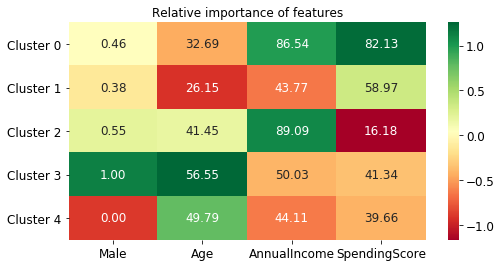

In [13]:
import seaborn as sns

all_means = X.mean(axis=0)

relative_imp = means - all_means

plt.figure(figsize=(8, 4));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, 
            annot=scaler.inverse_transform(relative_imp), 
            fmt='.2f', 
            cmap='RdYlGn', 
            robust=True, 
            square=False,
            xticklabels=col_names, 
            yticklabels=['Cluster {}'.format(x) for x in range(K)]);
plt.savefig('out/mall_heatmap.png')